# Modeling TF-IDF + XGB (XGBoostClassifier) Notebook

**Based on the developed pipeline in `template_logreg_tfidf.ipynb`**

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from xgboost import XGBClassifier
from sklearn.metrics import (
    fbeta_score,
    make_scorer
)
from joblib import dump, load
from scipy.stats import loguniform, randint

sys.path.append(os.path.abspath('..'))
from src.evaluation_visualization import (
    plot_learning_curves,
    plot_confusion_matrix,
    plot_roc_and_pr_curves,
    plot_threshold_curves,
    extended_classification_report,
    get_metrics_dict
)
from src.preprocessing import process_file
from src.optimize_threshold import (
    optimize_threshold_with_cv,
    get_threshold_evaluation_data,
    get_threshold_evaluation_data_cv
)
from src.optuna_optimizer import (
    optimize_with_optuna,
    sample_class_weight_value
)
from src.optuna_visualizations import (
    plot_optuna_study_analysis,
    quick_optuna_analysis
)

**a) XGBClassifier with basic preprocessed data**

In [12]:
# Load and preprocess data (basic mode)
df_basiccleaned = process_file(
    filepath='../05modeling_pipelines/1klabeled_segments.csv',
    file_format='csv',
    text_key='SegmentText', 
    mode='basic'  # basic cleaning mode
)

# Map labels to binary values
df_basiccleaned['Label'] = df_basiccleaned['Label'].map({"['relevant']": 1, "['irrelevant']": 0})

Starting Optuna hyperparameter optimization ...


c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found by Optuna TPE: {'clf__learning_rate': 0.017394752869870533, 'clf__max_depth': 14, 'clf__n_estimators': 196, 'clf__gamma': 2.351713410395288, 'clf__colsample_bytree': 0.1358142484360347, 'clf__subsample': 0.9651481334646451, 'clf__reg_alpha': 0.43061685513714554, 'clf__reg_lambda': 4.835197221041057, 'clf__scale_pos_weight': 6.84602510392007, 'select__k': 164}
Best F2 score during optimization: 0.850

COMPREHENSIVE OPTUNA STUDY ANALYSIS & VISUALIZATIONS

1. Optimization History & Parameter Importance:


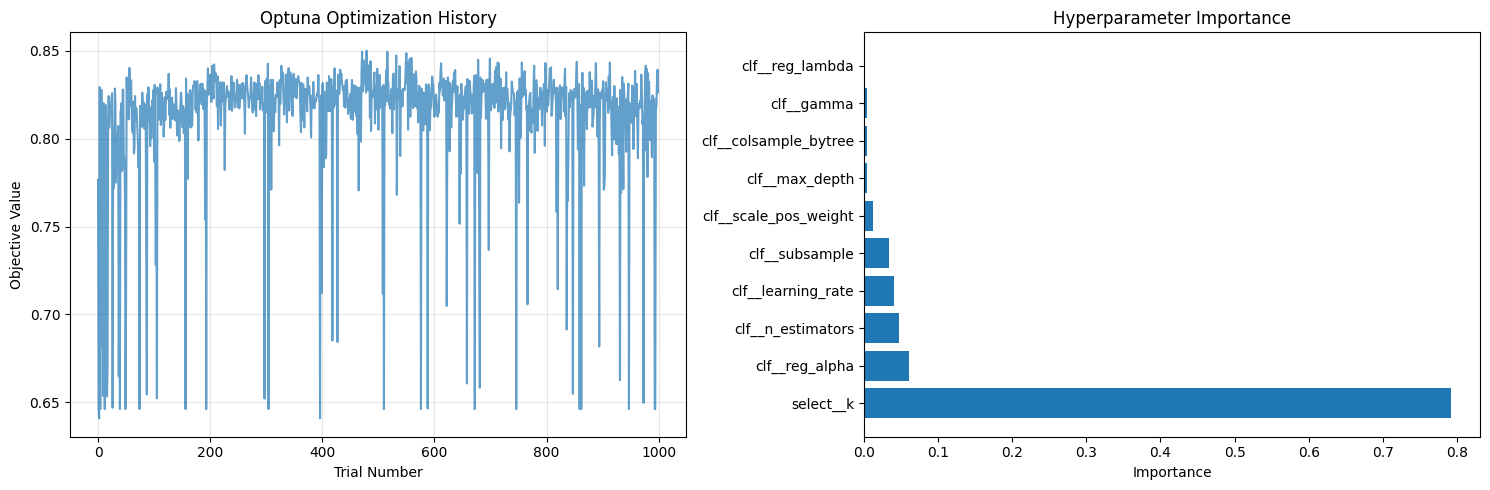


2. Parameter Value Distributions:


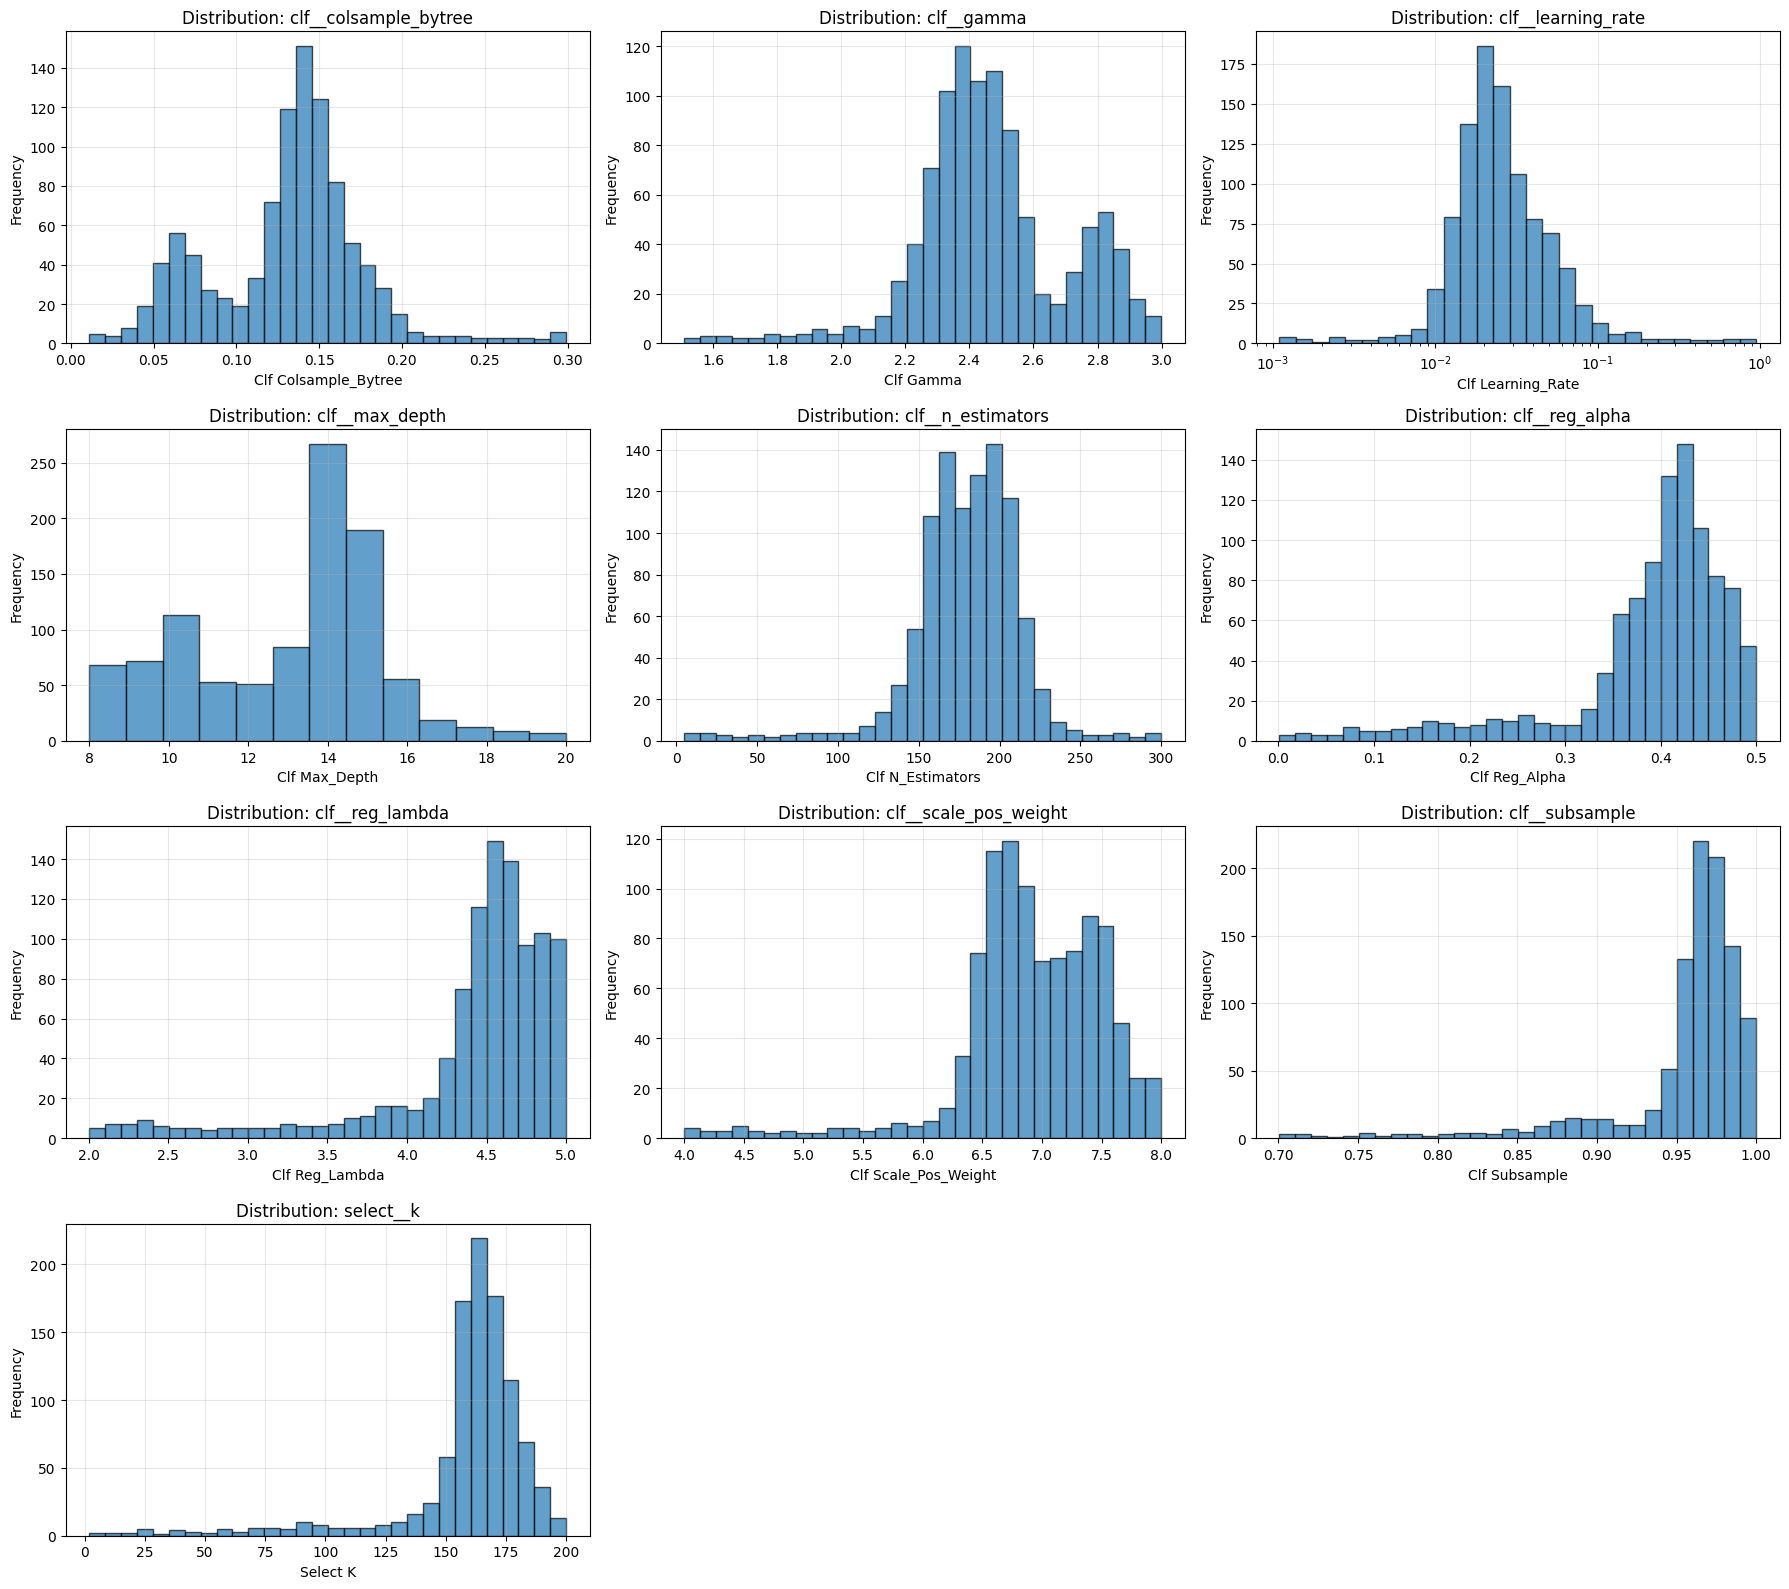


3. Performance vs Individual Parameters:


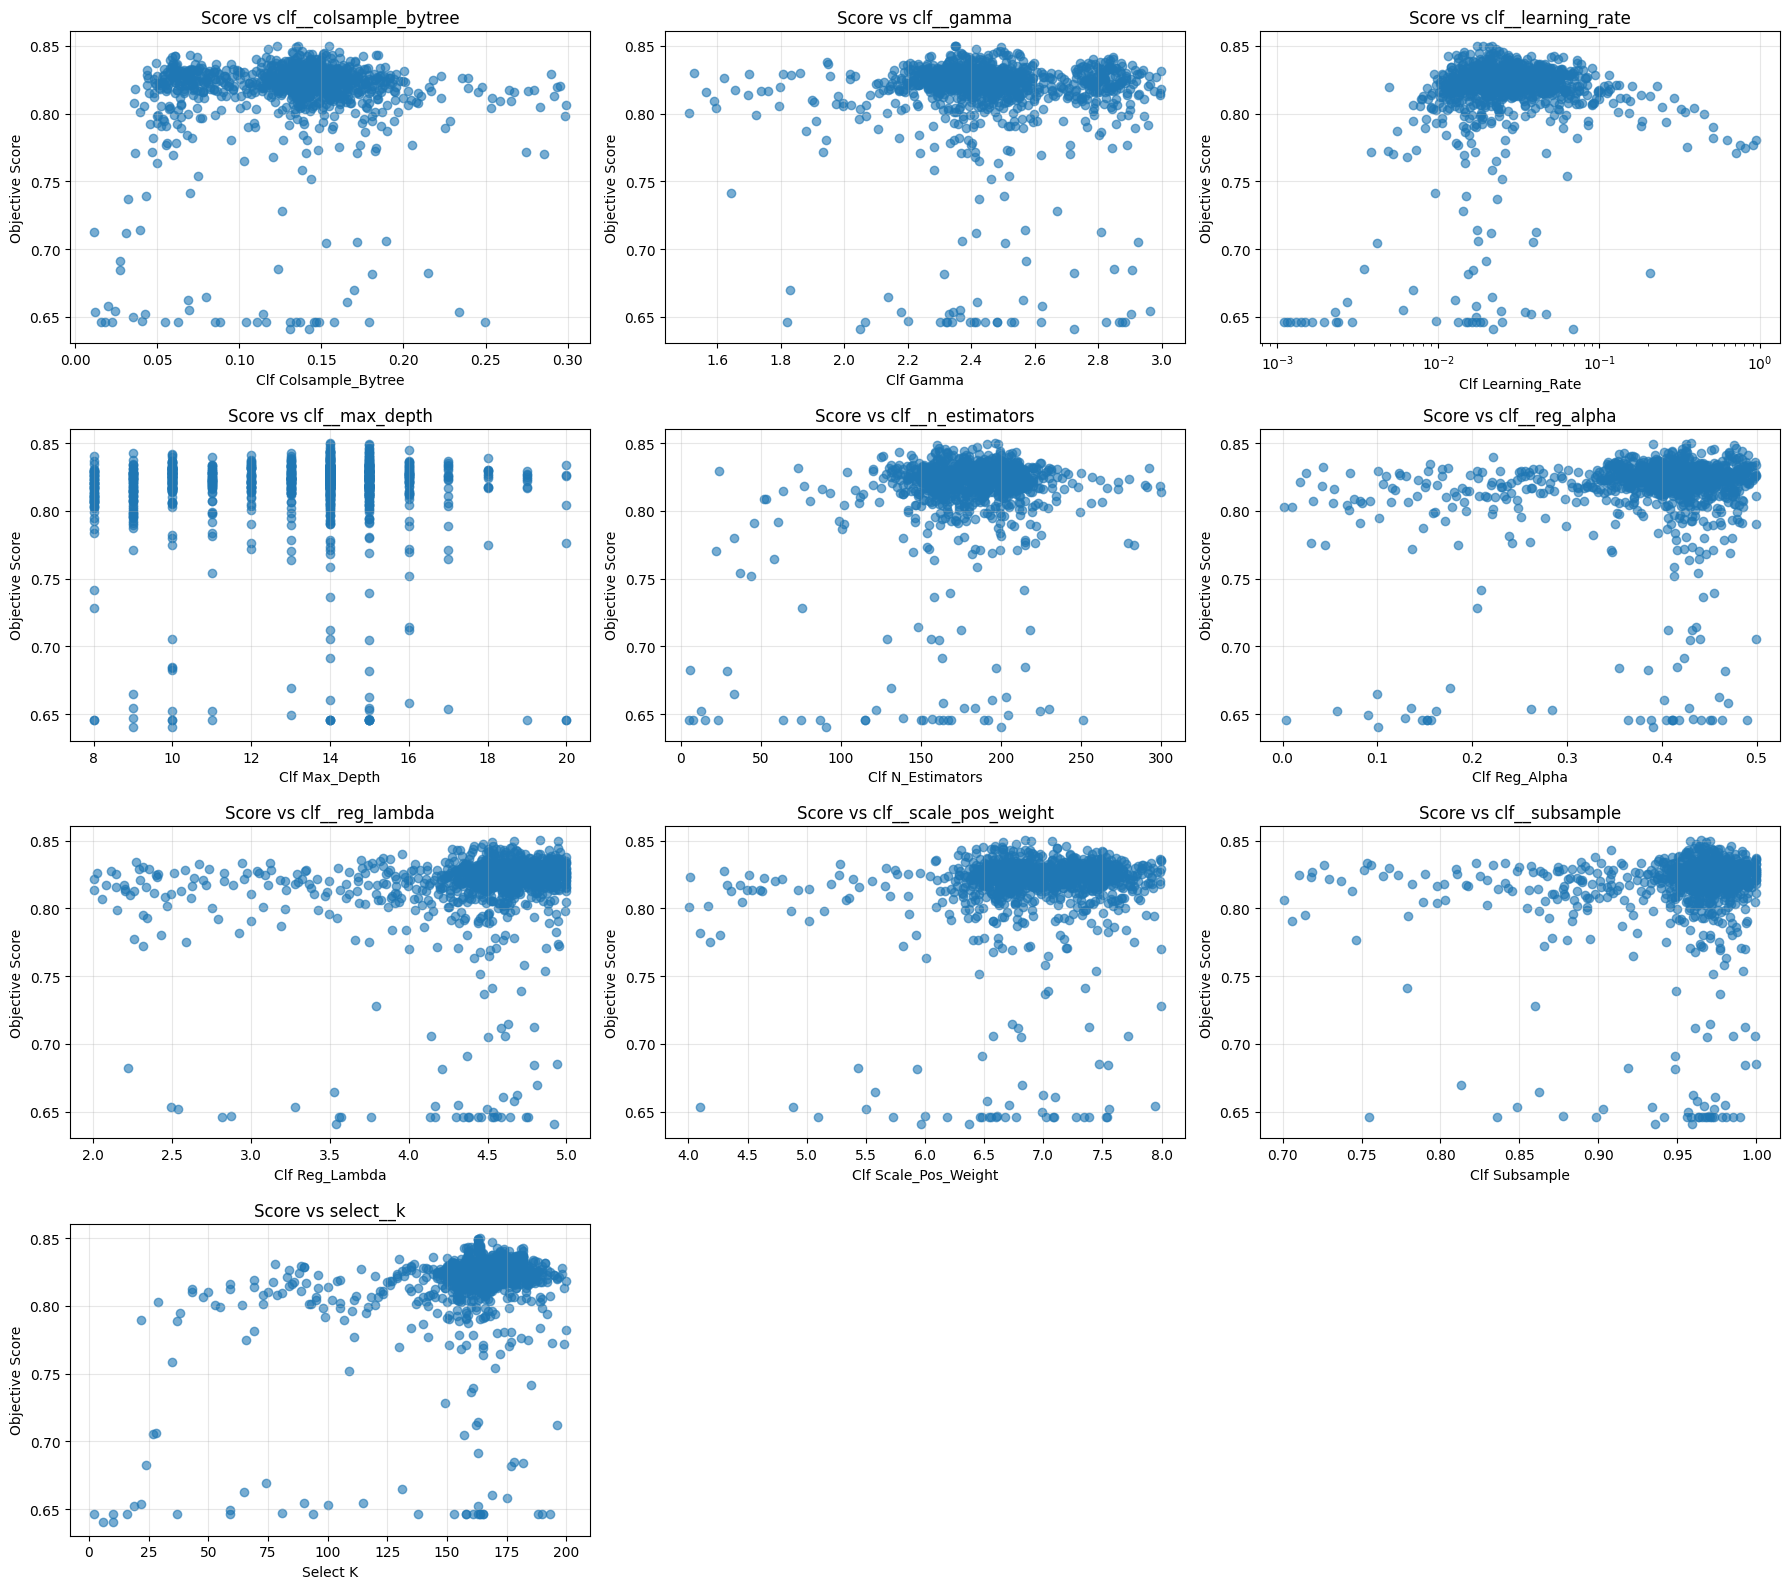


4. Convergence Analysis:


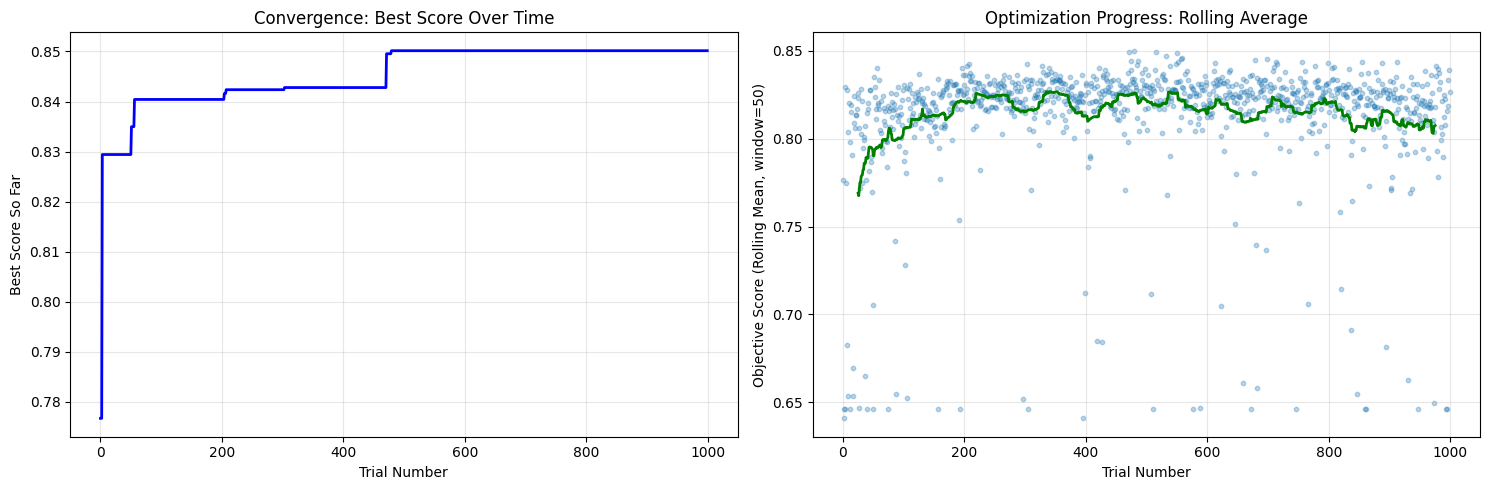


5. Trial Status Overview:


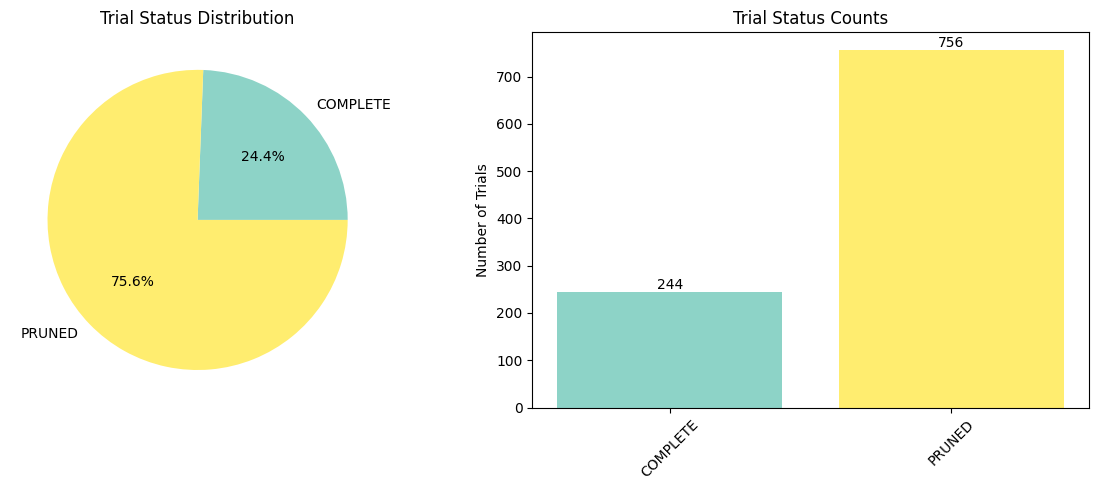


6. Top 10 Best Trials:
Rank Trial#  Score      colsample_bytree gamma        learning_rate max_depth    n_estimators reg_alpha    reg_lambda   scale_pos_weight subsample    k           
------------------------------------------------------------------------------------------------------------------------------------------------------------------
1    479     0.8502     0.1358       2.3517       0.0174       14           196          0.4306       4.8352       6.8460       0.9651       164         
2    471     0.8495     0.1231       2.3500       0.0217       14           198          0.3912       4.9468       7.0742       0.9704       163         
3    516     0.8495     0.1544       2.3488       0.0189       15           191          0.4257       4.6650       6.8972       0.9578       163         
4    550     0.8487     0.1348       2.4926       0.0206       15           160          0.4762       4.5259       6.6632       0.9684       163         
5    532     0.8474     0.1176    

c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:21] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:21] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:21] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:23] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\lear

Optimized threshold: 0.504
CV F2-score with optimized threshold: 0.852

Generating unbiased threshold visualization...


c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:24] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:25] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:25] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:25:25] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\lear

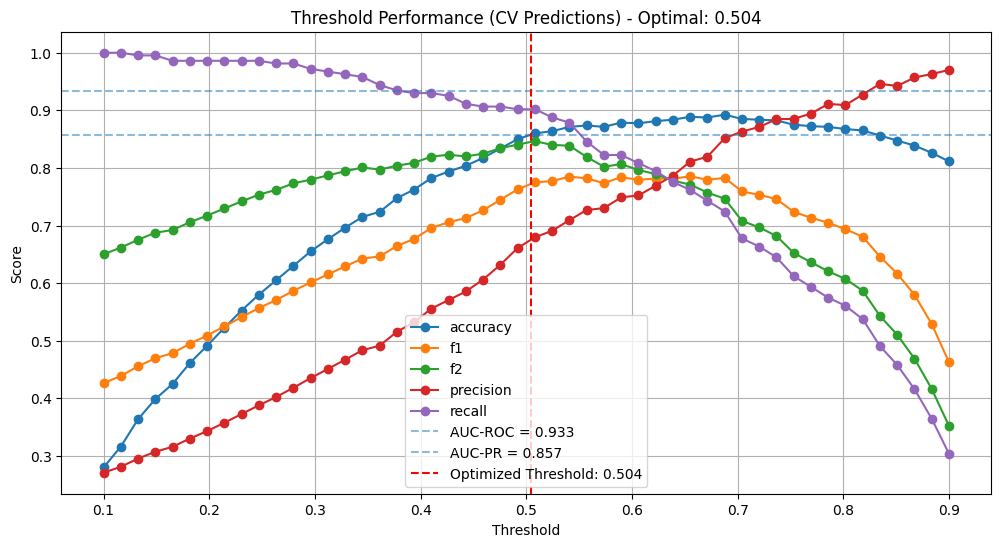

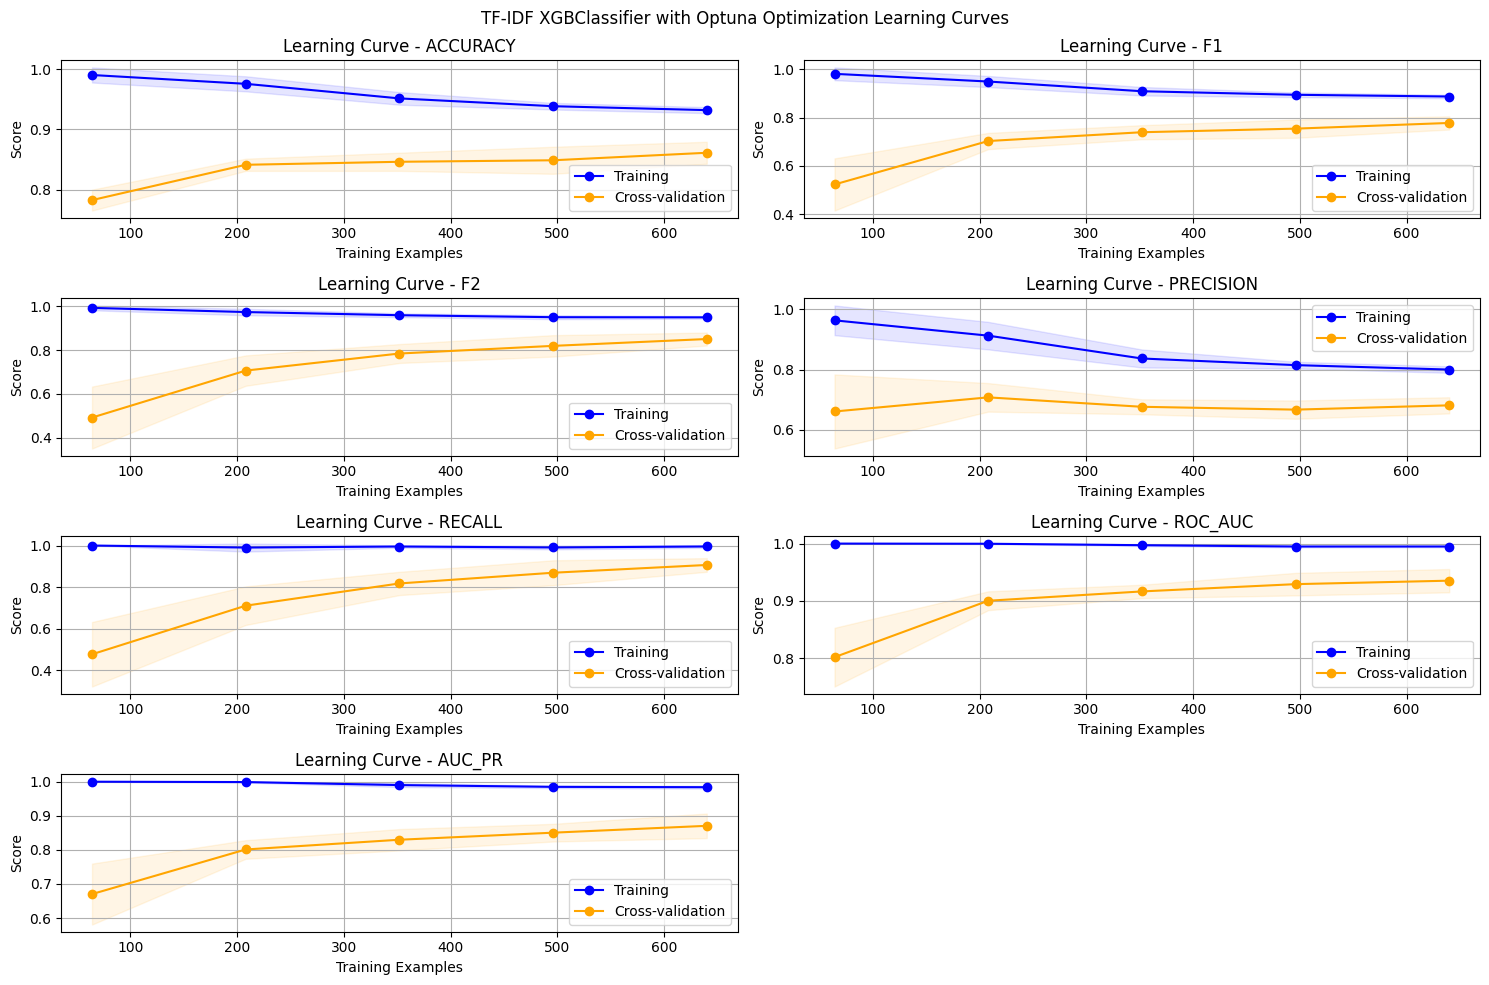


Final Threshold: 0.50

Test Set Performance:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       146
           1       0.58      0.78      0.67        54

    accuracy                           0.79       200
   macro avg       0.74      0.79      0.76       200
weighted avg       0.82      0.79      0.80       200

Additional Metrics:
Accuracy   0.790
F2-score   0.729
AUC-ROC    0.884
AUC-PR     0.815



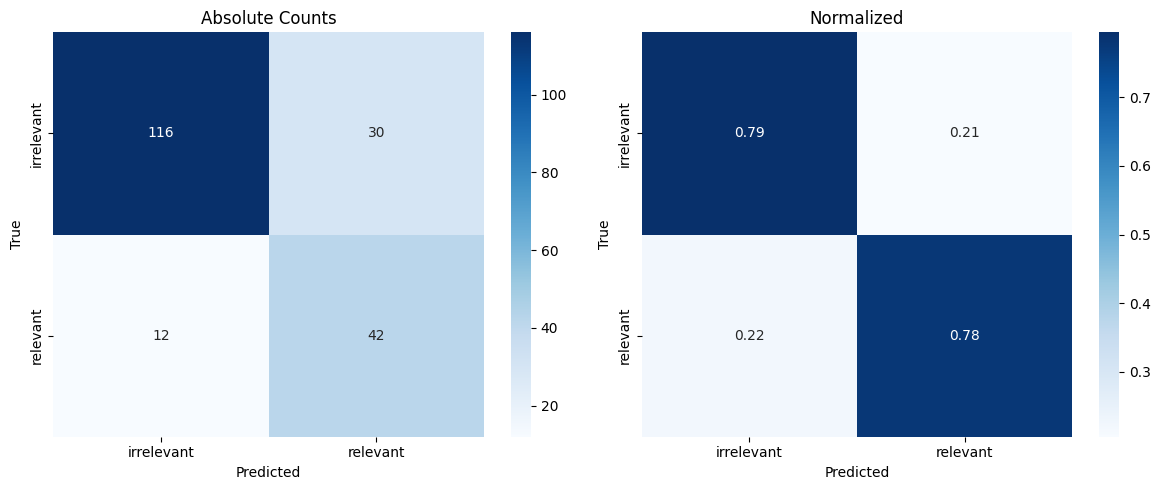

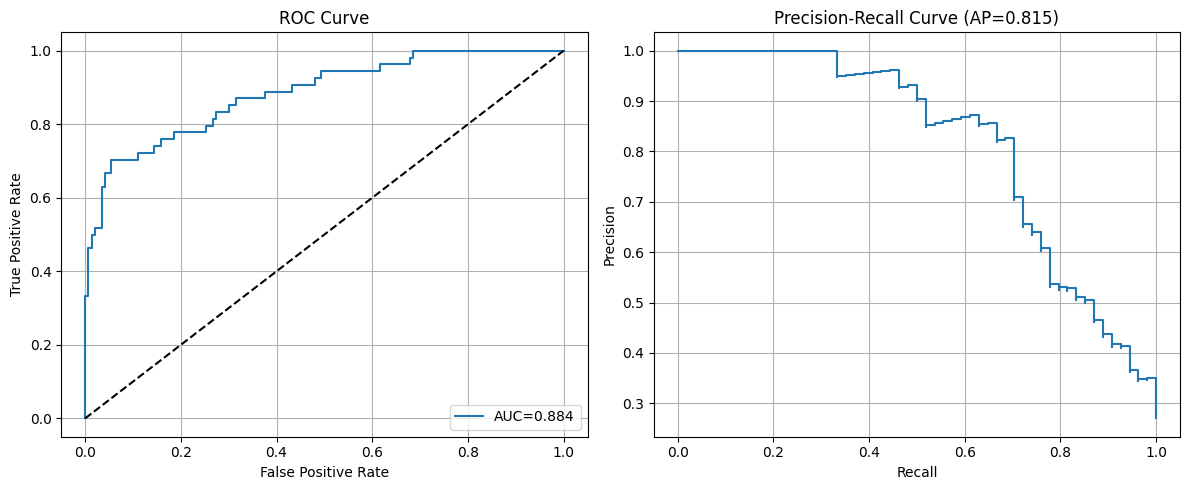


Model saved as 'model_tfidf_xgbclassifier_basic.joblib'


In [17]:
#perform train-test split
# Holdout-Split (80% training, 20% final test)
X_dev, X_test, y_dev, y_test = train_test_split(
    df_basiccleaned["SegmentText"], df_basiccleaned["Label"],
    test_size=0.2,
    stratify=df_basiccleaned["Label"],
    random_state=42
)

# Define a pipeline: TF-IDF vectorization, chi2 feature selection, and a XGB classifier 
pipeline_tfidf_xgb = Pipeline([
    ("tfidf",   TfidfVectorizer(lowercase=True)),
    ("select",  SelectKBest(score_func=chi2, k=2000)),
    ("clf",     XGBClassifier(
                objective='binary:logistic',
                use_label_encoder=False, #already encoded labels
                eval_metric='logloss',  # Evaluation metric for XGBoost, we can use precict_proba 
                n_jobs=-1,  # Use all available CPU cores
                random_state=42,                  
                ))
])

# CV Strategy (consistent across all sections)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Optuna Parameter Space using TPE Algorithm
print("Starting Optuna hyperparameter optimization ...")

# Define parameter space for Optuna optimization
param_space = {
    "clf__learning_rate": lambda trial: trial.suggest_float("clf__learning_rate", 1e-3, 1.0, log=True), # controls learning speed; lower values reduce overfitting and improve generalization
    "clf__max_depth": lambda trial: trial.suggest_int("clf__max_depth", 8, 20), # limits tree complexity; shallow trees prevent overfitting with sparse TF-IDF features
    "clf__n_estimators": lambda trial: trial.suggest_int("clf__n_estimators", 5, 300), # number of boosting rounds; more trees = higher capacity but risk of overfitting
    "clf__gamma": lambda trial: trial.suggest_float("clf__gamma", 1.5, 3.0), # minimum loss reduction to make a split; higher values prevent overfitting
    "clf__colsample_bytree": lambda trial: trial.suggest_float("clf__colsample_bytree", 1e-2, 0.3), # fraction of features used per tree; reduces overfitting and speeds up training
    "clf__subsample": lambda trial: trial.suggest_float("clf__subsample", 0.7, 1.0), # fraction of samples used per tree; reduces variance and prevents overfitting
    "clf__reg_alpha": lambda trial: trial.suggest_float("clf__reg_alpha", 1e-3, 0.5), # L1 regularization; promotes sparsity, beneficial for high-dimensional TF-IDF features
    "clf__reg_lambda": lambda trial: trial.suggest_float("clf__reg_lambda", 2.0, 5.0), # L2 regularization; prevents large weights, stabilizes training with sparse features
    "clf__scale_pos_weight": lambda trial: trial.suggest_float("clf__scale_pos_weight", 4.0, 8.0), # handles class imbalance; approximates negative/positive ratio (~3:1 in your dataset)
    "select__k": lambda trial: trial.suggest_int("select__k", 1, 200) # number of top chi² features; balances information retention and dimensionality reduction
}

# Execute Optuna optimization with TPE sampler
best_model, best_params, study = optimize_with_optuna(
    estimator=pipeline_tfidf_xgb,
    param_space=param_space,
    X=X_dev, 
    y=y_dev,
    cv=cv,
    n_trials=1000,  # Intelligent search with early stopping
    direction="maximize",
    n_jobs=-1,
    random_state=42,
    verbose=False,  # No console output, only file logging
    log_to_file=True,
    model_name="tfidf_xgb_basic"
)

print("Best parameters found by Optuna TPE:", best_params)
print(f"Best F2 score during optimization: {study.best_value:.3f}")

# Show optimization history/statistics
plot_optuna_study_analysis(study)

# Extract the base model for threshold optimization
base_model = best_model

# Proper threshold optimization with nested CV using consistent CV strategy
print("\nOptimizing threshold with nested cross-validation (coarse-to-fine)...")
tuned_model, threshold_results = optimize_threshold_with_cv(
    base_estimator=base_model,
    X=X_dev,
    y=y_dev,
    scoring='f2',
    cv=cv,  # Use same CV strategy as hyperparameter optimization for consistency
    thresholds=50,
    coarse_to_fine=True,
    fine_range_factor=0.15,
    n_jobs=-1,
    random_state=42
)

print(f"Optimized threshold: {threshold_results['best_threshold']:.3f}")
print(f"CV F2-score with optimized threshold: {threshold_results['cv_score']:.3f}")

# Unbiased threshold visualization using consistent CV strategy
print("\nGenerating unbiased threshold visualization...")

viz_data_cv = get_threshold_evaluation_data_cv(
    base_estimator=base_model,
    X=X_dev, 
    y=y_dev,
    cv=cv  # Use same CV for visualization consistency
)

plot_threshold_curves(viz_data_cv)
plt.title(f'Threshold Performance (CV Predictions) - Optimal: {threshold_results["best_threshold"]:.3f}')
plt.axvline(x=threshold_results['best_threshold'], color='red', linestyle='--', 
           label=f'Optimized Threshold: {threshold_results["best_threshold"]:.3f}')
plt.legend()
plt.show()

# Learning curves analysis
plot_learning_curves(
    base_model, X_dev, y_dev,  # Use base model for learning curves
    cv=cv,
    figsize=(15, 10)
)
plt.suptitle('TF-IDF XGBClassifier with Optuna Optimization Learning Curves')
plt.tight_layout()
plt.show()

# Final evaluation on test set using the tuned model
y_test_pred = tuned_model.predict(X_test)  # Uses optimized threshold automatically
y_test_proba = tuned_model.predict_proba(X_test)[:, 1] 

print(f"\nFinal Threshold: {threshold_results['best_threshold']:.2f}")
print("\nTest Set Performance:")
test_report_str = extended_classification_report(y_test, y_test_pred, y_test_proba)
print(test_report_str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, y_test_pred, normalize=False, ax=ax1, title='Absolute Counts')
plot_confusion_matrix(y_test, y_test_pred, normalize=True,  ax=ax2, title='Normalized')
plt.tight_layout()
plt.show()

# ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_test_proba)
plt.show()

# Extract structured test performance metrics using modular approach
test_metrics = get_metrics_dict(y_test, y_test_pred, y_test_proba)

# For completeness, also get CV performance metrics (using dummy data for CV report format)
# Note: We use y_dev here as representative CV data since actual CV predictions aren't stored
cv_pred_dummy = base_model.predict(X_dev)
cv_proba_dummy = base_model.predict_proba(X_dev)[:, 1]
cv_metrics = get_metrics_dict(y_dev, cv_pred_dummy, cv_proba_dummy)

# Create comprehensive results summary
results_summary = {
    'model_name': 'TF-IDF + XGBClassifier',
    'preprocessing_type': 'basic',
    'optimization_method': 'Optuna TPE + TunedThresholdClassifierCV',
    'best_params': best_params,
    'cv_results': {
        'best_f2_score': study.best_value,
        'optimized_threshold': threshold_results['best_threshold'],
        'cv_f2_with_threshold': threshold_results['cv_score'],
        'cv_performance_metrics': cv_metrics  # Representative CV performance
    },
    'test_results': {
        'threshold_used': threshold_results['best_threshold'], 
        'test_performance_metrics': test_metrics,  # Complete test performance
        'formatted_report': test_report_str  # Human-readable report
    },
    'dataset_info': {
        'train_size': len(X_dev),
        'test_size': len(X_test),
        'train_positive_ratio': y_dev.mean(),
        'test_positive_ratio': y_test.mean()
    }
}

# Save the properly tuned model with comprehensive results
dump({
    'model': tuned_model,  # This includes the optimized threshold
    'base_model': base_model,  # Original model without threshold optimization
    'threshold': threshold_results['best_threshold'],
    'cv_score': threshold_results['cv_score'],
    'best_params': best_params,
    'search_type': 'Optuna TPE + TunedThresholdClassifierCV',
    'results_summary': results_summary  # Complete structured results for model comparison
}, "model_tfidf_xgbclassifier_basic.joblib")

print(f"\nModel saved as 'model_tfidf_xgbclassifier_basic.joblib'")

**b) XGBClassifier based on advanced preprocessed data**

In [4]:
# Load and preprocess data (advanced mode)
df_advancedcleaned = process_file(
    filepath='../05modeling_pipelines/1klabeled_segments.csv',
    file_format='csv',
    text_key='SegmentText', 
    mode='advanced'  # basic cleaning mode
)

# Map labels to binary values
df_advancedcleaned['Label'] = df_advancedcleaned['Label'].map({"['relevant']": 1, "['irrelevant']": 0})

Starting Optuna hyperparameter optimization ...


c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:05] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found by Optuna TPE: {'clf__learning_rate': 0.0468295091344938, 'clf__max_depth': 9, 'clf__n_estimators': 277, 'clf__gamma': 1.3785807809105959, 'clf__colsample_bytree': 0.06674112100066044, 'clf__subsample': 0.827392571271514, 'clf__reg_alpha': 1.905806538795446, 'clf__reg_lambda': 1.1835769347327323, 'clf__scale_pos_weight': 8.142782496955547, 'select__k': 109}
Best F2 score during optimization: 0.864

COMPREHENSIVE OPTUNA STUDY ANALYSIS & VISUALIZATIONS

1. Optimization History & Parameter Importance:


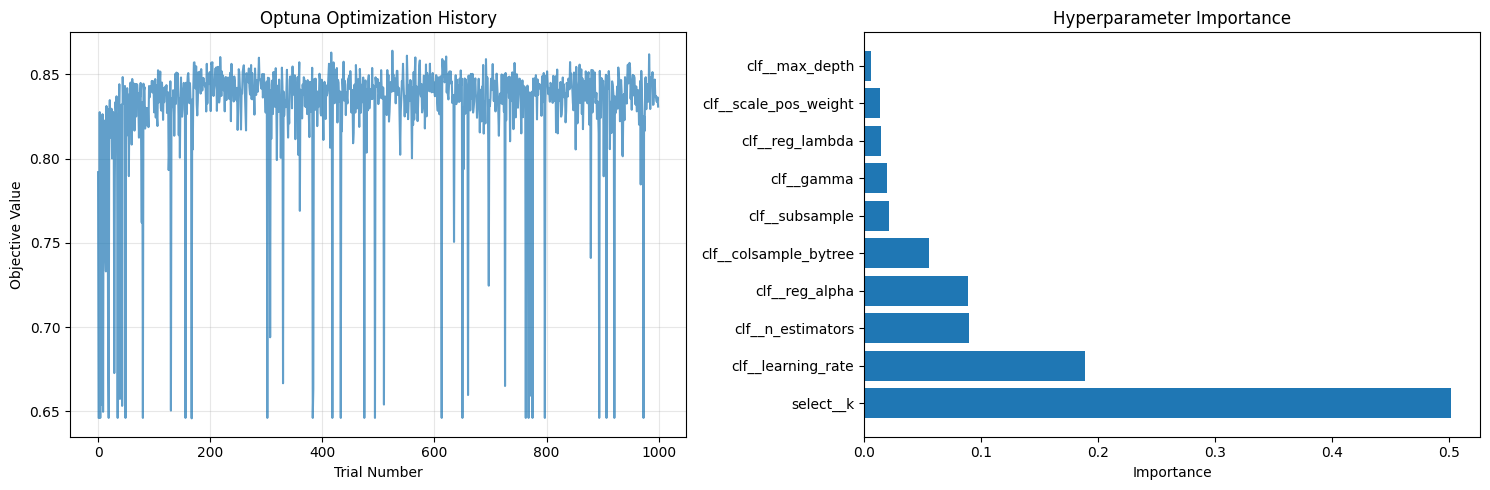


2. Parameter Value Distributions:


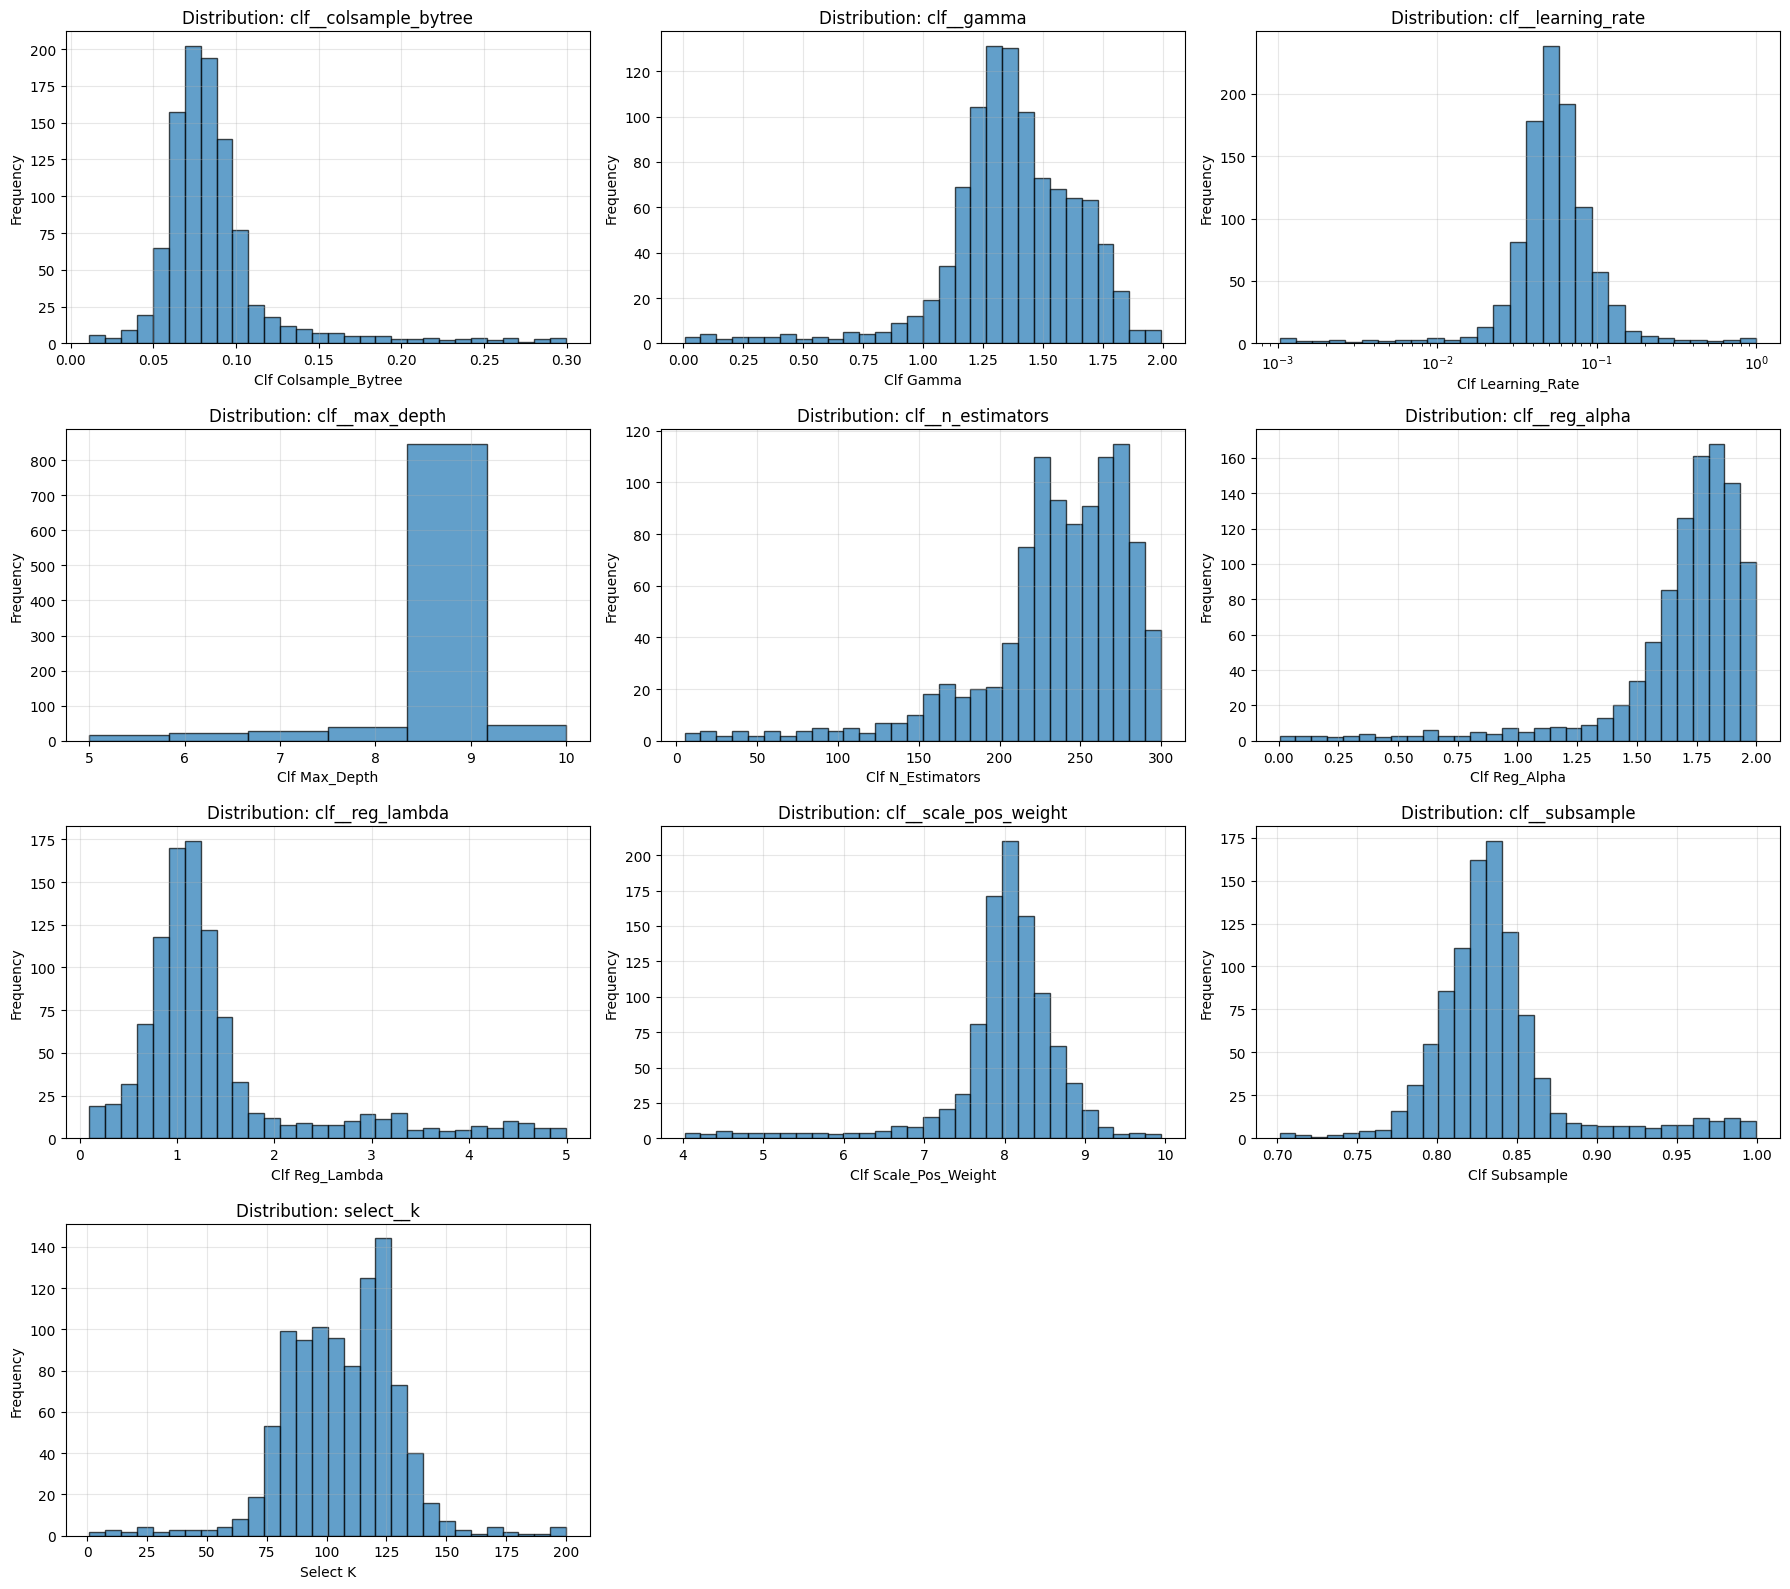


3. Performance vs Individual Parameters:


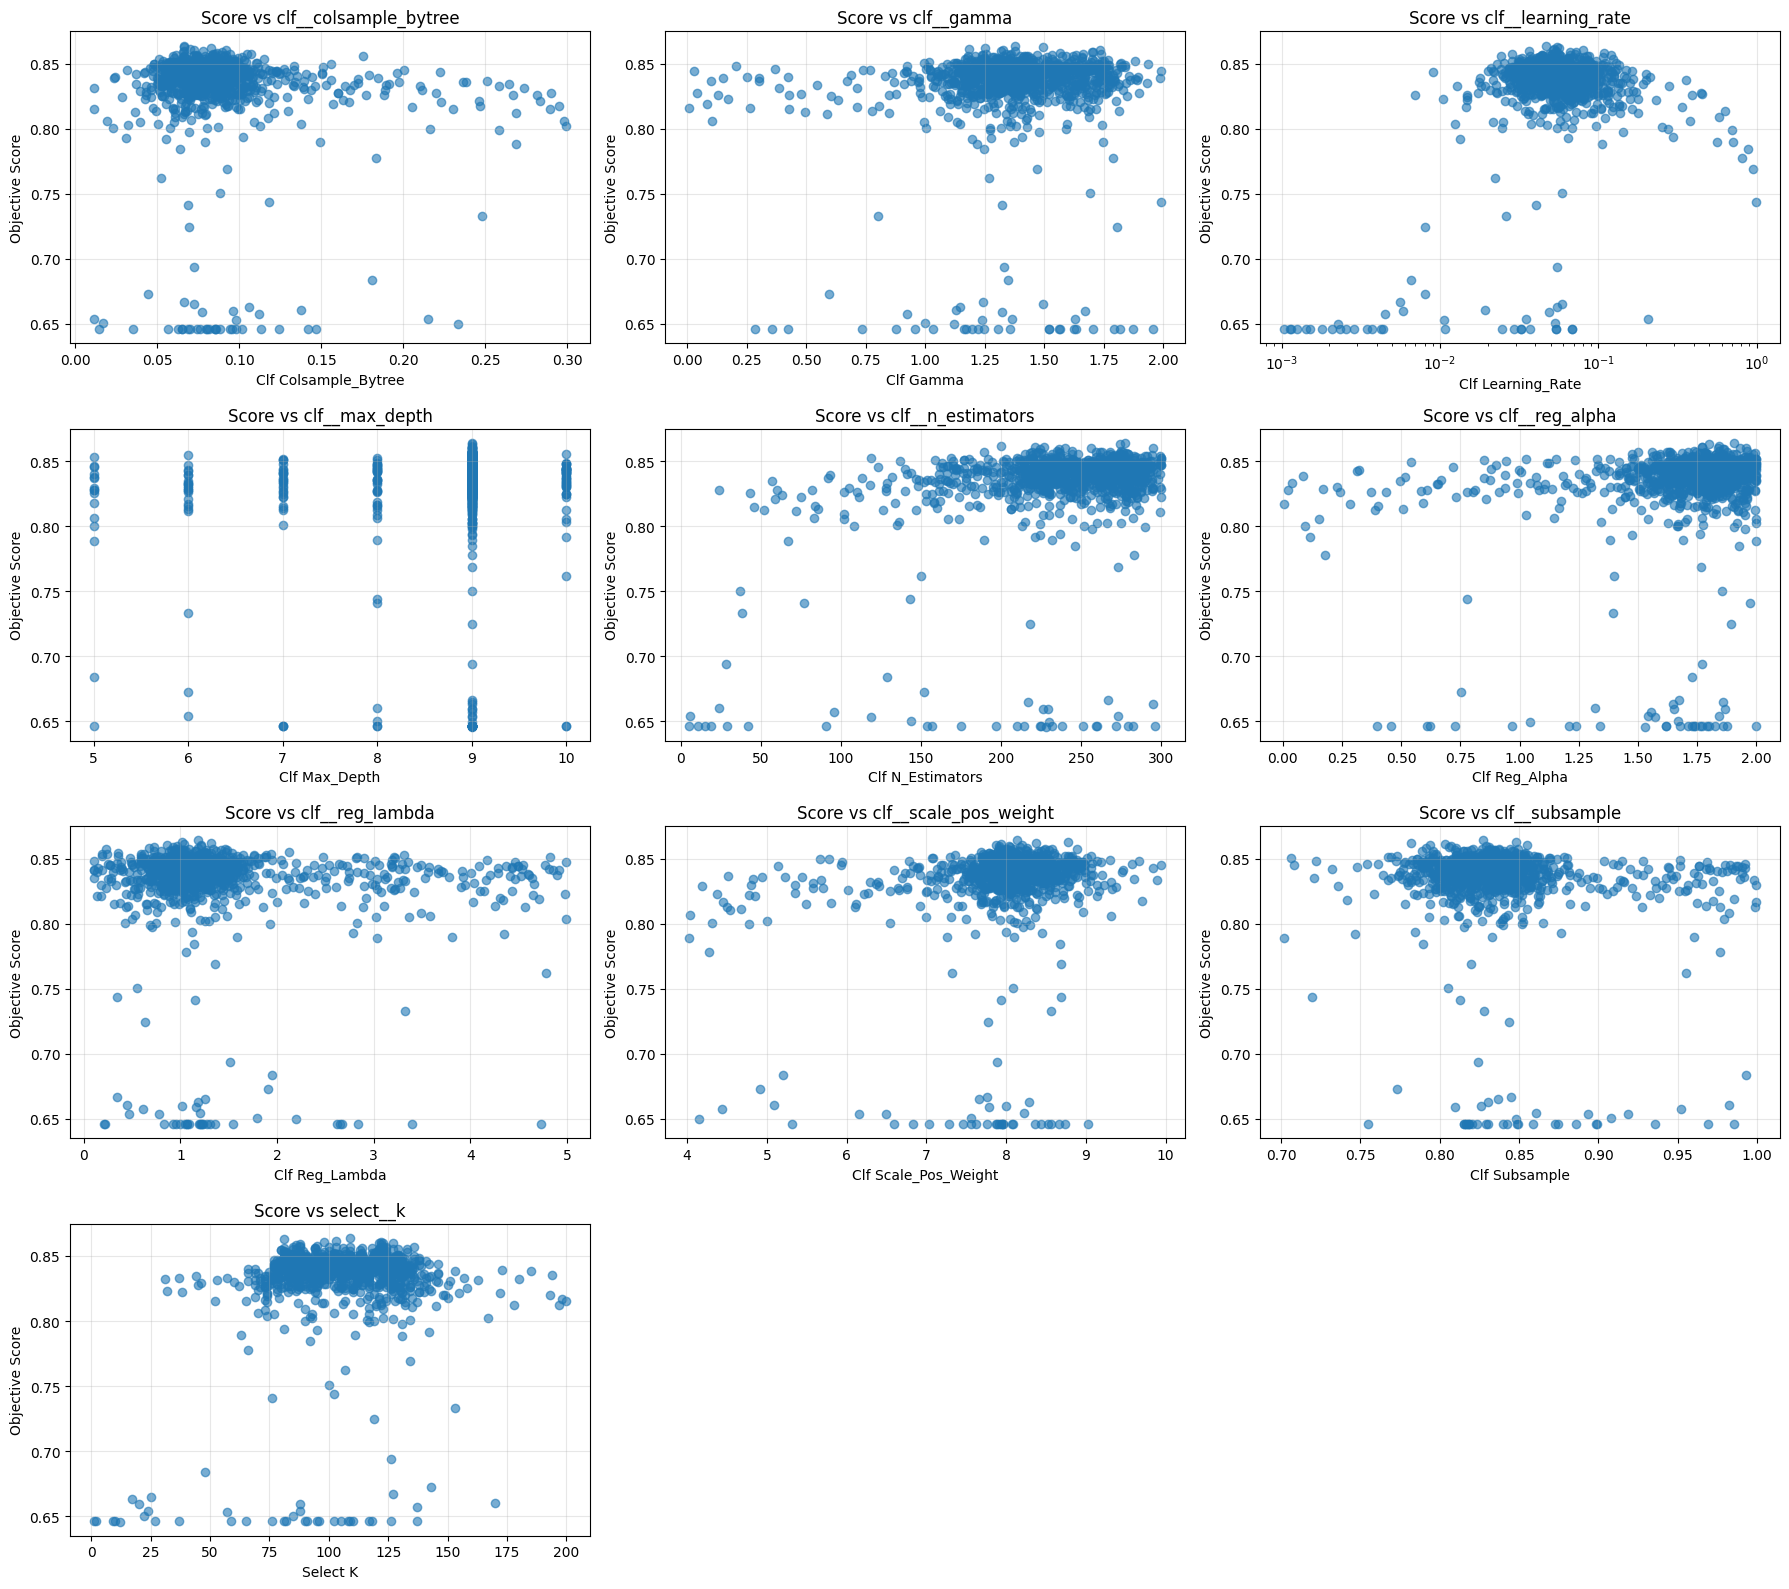


4. Convergence Analysis:


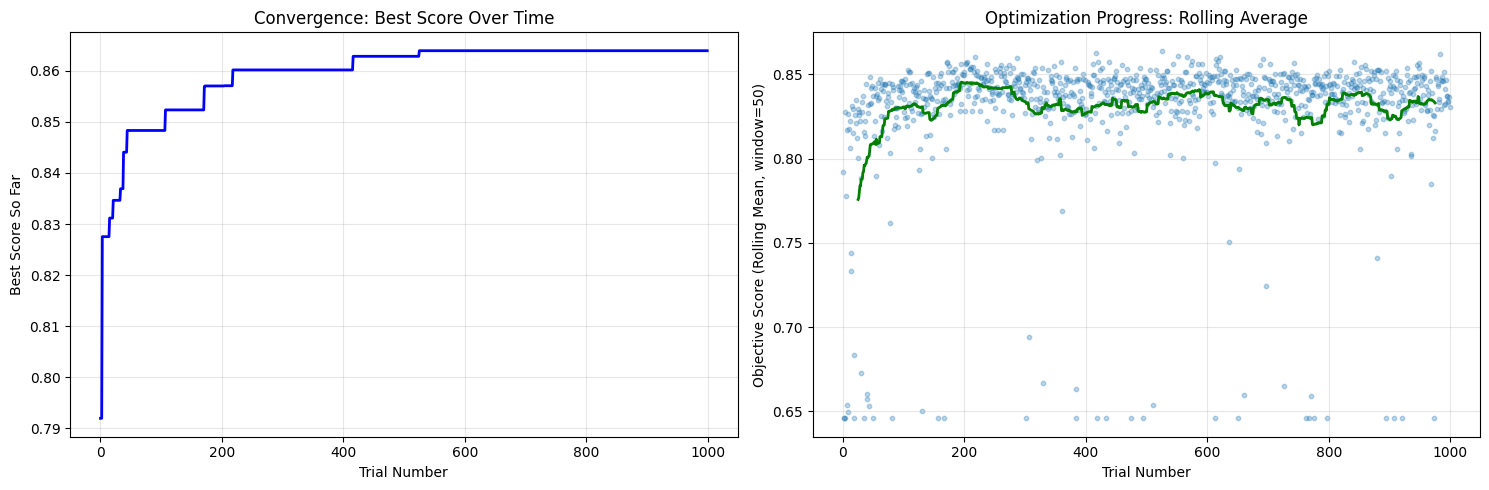


5. Trial Status Overview:


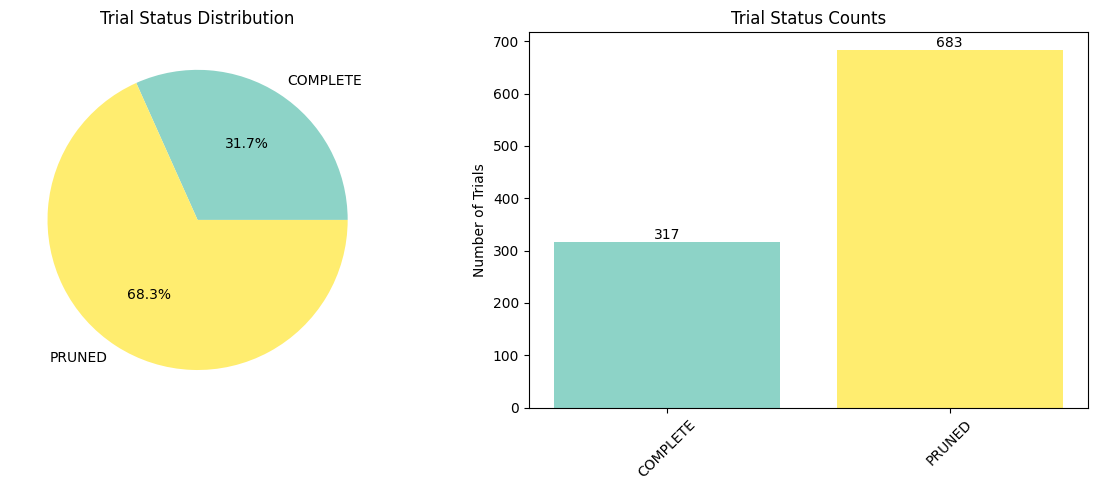


6. Top 10 Best Trials:
Rank Trial#  Score      colsample_bytree gamma        learning_rate max_depth    n_estimators reg_alpha    reg_lambda   scale_pos_weight subsample    k           
------------------------------------------------------------------------------------------------------------------------------------------------------------------
1    525     0.8640     0.0667       1.3786       0.0468       9            277          1.9058       1.1836       8.1428       0.8274       109         
2    416     0.8629     0.0663       1.4946       0.0552       9            274          1.7982       1.0126       8.7825       0.8479       81          
3    983     0.8618     0.0827       1.2531       0.0568       9            200          1.8430       1.3153       8.3806       0.7816       103         
4    551     0.8610     0.0701       1.1849       0.0527       9            221          1.7716       1.0380       7.9383       0.8031       122         
5    621     0.8605     0.0921    

c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\lear

Optimized threshold: 0.503
CV F2-score with optimized threshold: 0.864

Generating unbiased threshold visualization...


c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tdoro\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\lear

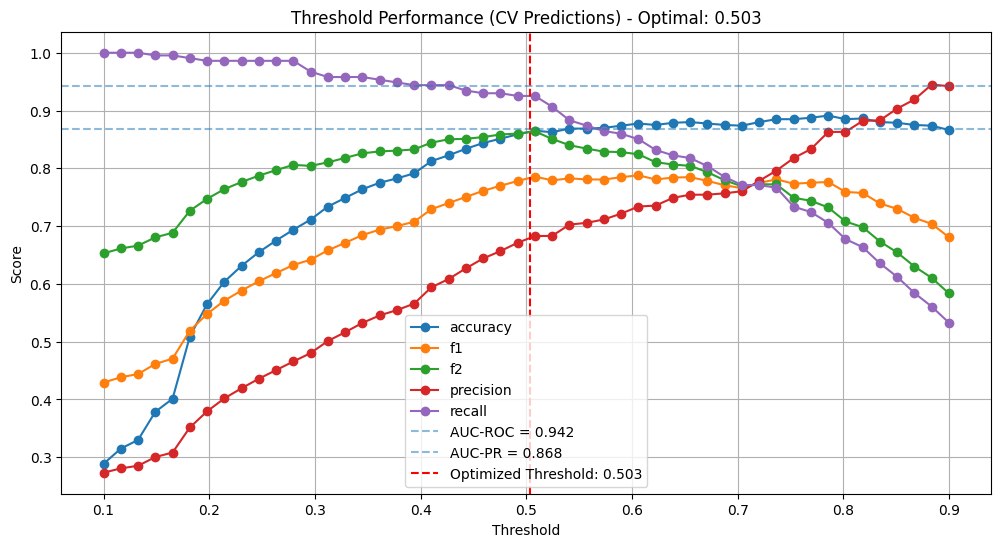

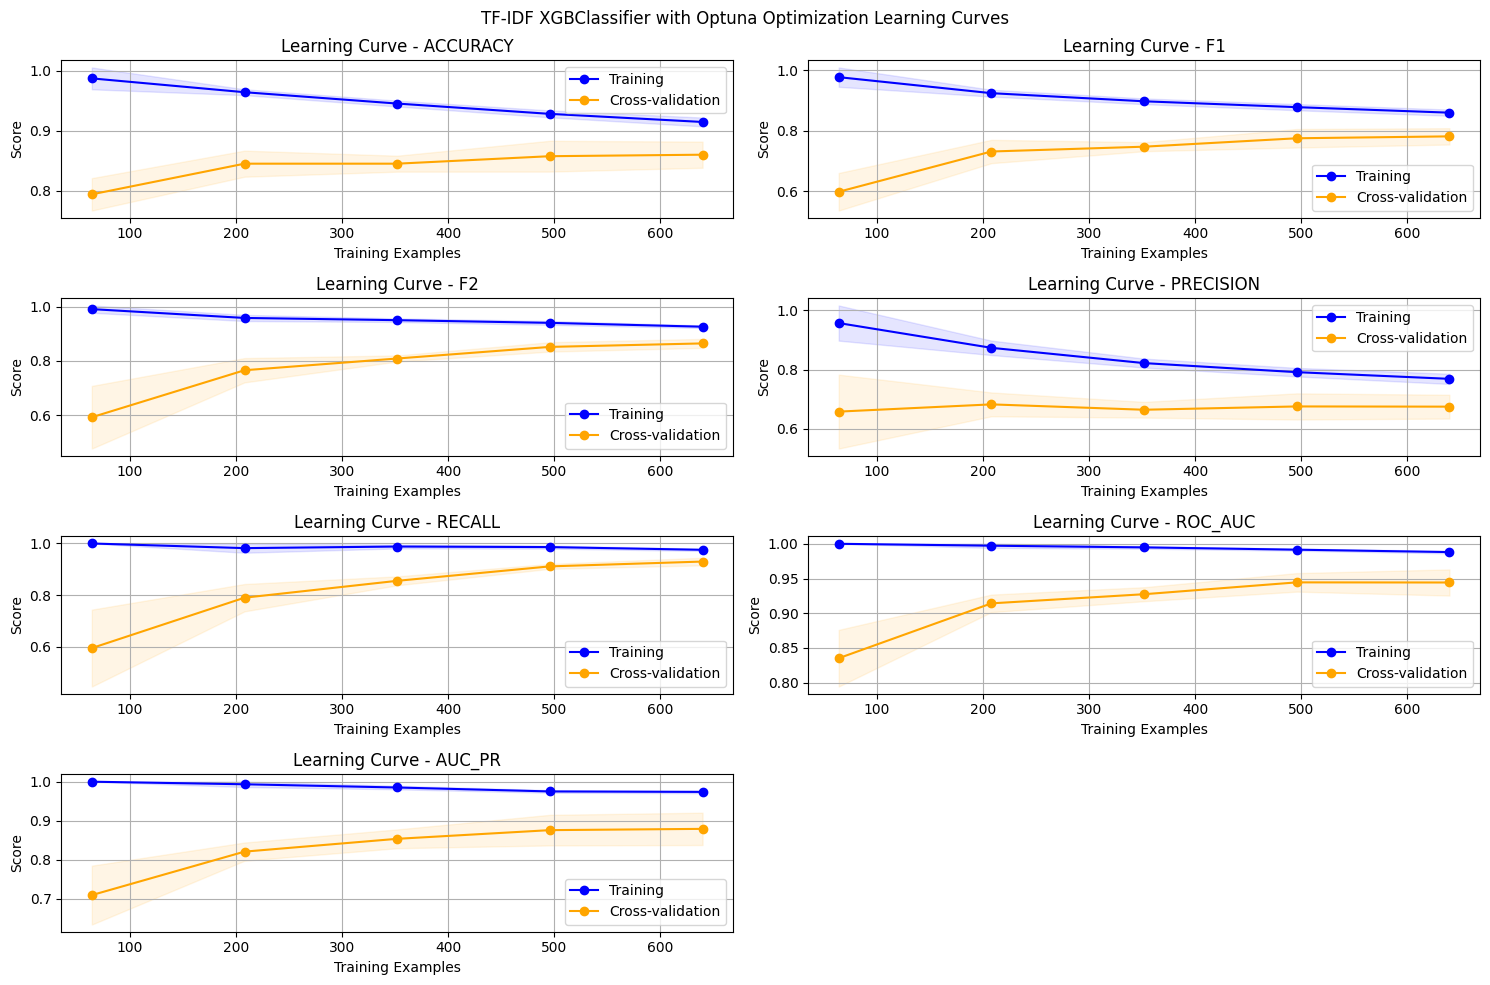


Final Threshold: 0.50

Test Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       146
           1       0.63      0.81      0.71        54

    accuracy                           0.82       200
   macro avg       0.78      0.82      0.79       200
weighted avg       0.84      0.82      0.83       200

Additional Metrics:
Accuracy   0.820
F2-score   0.769
AUC-ROC    0.904
AUC-PR     0.825



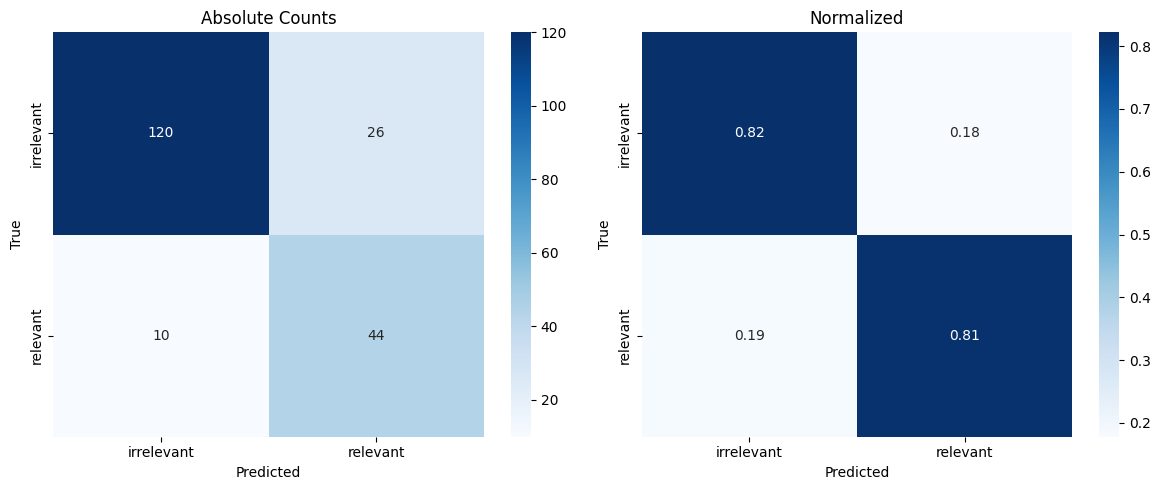

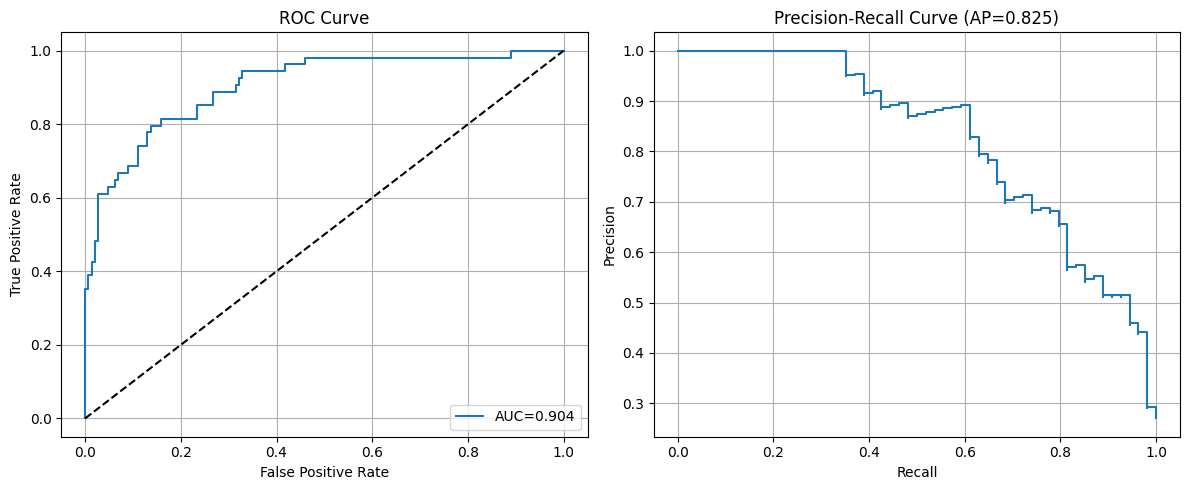


Model saved as 'model_tfidf_xgbclassifier_advanced.joblib'


In [7]:
#perform train-test split on advanced cleaned data
# Holdout-Split (80% training, 20% final test)
X_dev, X_test, y_dev, y_test = train_test_split(
    df_advancedcleaned["SegmentText"], df_advancedcleaned["Label"],
    test_size=0.2,
    stratify=df_advancedcleaned["Label"],
    random_state=42
)

# Define a pipeline: TF-IDF vectorization, chi2 feature selection, and a XGB classifier 
pipeline_tfidf_xgb = Pipeline([
    ("tfidf",   TfidfVectorizer(lowercase=True)),
    ("select",  SelectKBest(score_func=chi2, k=2000)),
    ("clf",     XGBClassifier(
                objective='binary:logistic',
                use_label_encoder=False, #already encoded labels
                eval_metric='logloss',  # Evaluation metric for XGBoost, we can use precict_proba 
                n_jobs=-1,  # Use all available CPU cores
                random_state=42,                  
                ))
])

# CV Strategy (consistent across all sections)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Optuna Parameter Space using TPE Algorithm
print("Starting Optuna hyperparameter optimization ...")

# Define parameter space for Optuna optimization
param_space = {
    "clf__learning_rate": lambda trial: trial.suggest_float("clf__learning_rate", 1e-3, 1.0, log=True), # controls learning speed; lower values reduce overfitting and improve generalization
    "clf__max_depth": lambda trial: trial.suggest_int("clf__max_depth", 5, 10), # limits tree complexity; shallow trees prevent overfitting with sparse TF-IDF features
    "clf__n_estimators": lambda trial: trial.suggest_int("clf__n_estimators", 5, 300), # number of boosting rounds; more trees = higher capacity but risk of overfitting
    "clf__gamma": lambda trial: trial.suggest_float("clf__gamma", 0.0, 2.0), # minimum loss reduction to make a split; higher values prevent overfitting
    "clf__colsample_bytree": lambda trial: trial.suggest_float("clf__colsample_bytree", 1e-2, 0.3), # fraction of features used per tree; reduces overfitting and speeds up training
    "clf__subsample": lambda trial: trial.suggest_float("clf__subsample", 0.7, 1.0), # fraction of samples used per tree; reduces variance and prevents overfitting
    "clf__reg_alpha": lambda trial: trial.suggest_float("clf__reg_alpha", 0.0, 2.0), # L1 regularization; promotes sparsity, beneficial for high-dimensional TF-IDF features
    "clf__reg_lambda": lambda trial: trial.suggest_float("clf__reg_lambda", 0.1, 5.0), # L2 regularization; prevents large weights, stabilizes training with sparse features
    "clf__scale_pos_weight": lambda trial: trial.suggest_float("clf__scale_pos_weight", 4.0, 10.0), # handles class imbalance; approximates negative/positive ratio (~3:1 in your dataset)
    "select__k": lambda trial: trial.suggest_int("select__k", 1, 200) # number of top chi² features; balances information retention and dimensionality reduction
}

# Execute Optuna optimization with TPE sampler
best_model, best_params, study = optimize_with_optuna(
    estimator=pipeline_tfidf_xgb,
    param_space=param_space,
    X=X_dev, 
    y=y_dev,
    cv=cv,
    n_trials=1000,  # Intelligent search with early stopping
    direction="maximize",
    n_jobs=-1,
    random_state=42,
    verbose=False,  # No console output, only file logging
    log_to_file=True,
    model_name="tfidf_xgb_advanced"
)

print("Best parameters found by Optuna TPE:", best_params)
print(f"Best F2 score during optimization: {study.best_value:.3f}")

# Show optimization history/statistics
plot_optuna_study_analysis(study)

# Extract the base model for threshold optimization
base_model = best_model

# Proper threshold optimization with nested CV using consistent CV strategy
print("\nOptimizing threshold with nested cross-validation (coarse-to-fine)...")
tuned_model, threshold_results = optimize_threshold_with_cv(
    base_estimator=base_model,
    X=X_dev,
    y=y_dev,
    scoring='f2',
    cv=cv,  # Use same CV strategy as hyperparameter optimization for consistency
    thresholds=50,
    coarse_to_fine=True,
    fine_range_factor=0.15,
    n_jobs=-1,
    random_state=42
)

print(f"Optimized threshold: {threshold_results['best_threshold']:.3f}")
print(f"CV F2-score with optimized threshold: {threshold_results['cv_score']:.3f}")

# Unbiased threshold visualization using consistent CV strategy
print("\nGenerating unbiased threshold visualization...")

viz_data_cv = get_threshold_evaluation_data_cv(
    base_estimator=base_model,
    X=X_dev, 
    y=y_dev,
    cv=cv  # Use same CV for visualization consistency
)

plot_threshold_curves(viz_data_cv)
plt.title(f'Threshold Performance (CV Predictions) - Optimal: {threshold_results["best_threshold"]:.3f}')
plt.axvline(x=threshold_results['best_threshold'], color='red', linestyle='--', 
           label=f'Optimized Threshold: {threshold_results["best_threshold"]:.3f}')
plt.legend()
plt.show()

# Learning curves analysis
plot_learning_curves(
    base_model, X_dev, y_dev,  # Use base model for learning curves
    cv=cv,
    figsize=(15, 10)
)
plt.suptitle('TF-IDF XGBClassifier with Optuna Optimization Learning Curves')
plt.tight_layout()
plt.show()

# Final evaluation on test set using the tuned model
y_test_pred = tuned_model.predict(X_test)  # Uses optimized threshold automatically
y_test_proba = tuned_model.predict_proba(X_test)[:, 1] 

print(f"\nFinal Threshold: {threshold_results['best_threshold']:.2f}")
print("\nTest Set Performance:")
test_report_str = extended_classification_report(y_test, y_test_pred, y_test_proba)
print(test_report_str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, y_test_pred, normalize=False, ax=ax1, title='Absolute Counts')
plot_confusion_matrix(y_test, y_test_pred, normalize=True,  ax=ax2, title='Normalized')
plt.tight_layout()
plt.show()

# ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_test_proba)
plt.show()

# Extract structured test performance metrics using modular approach
test_metrics = get_metrics_dict(y_test, y_test_pred, y_test_proba)

# For completeness, also get CV performance metrics (using dummy data for CV report format)
# Note: We use y_dev here as representative CV data since actual CV predictions aren't stored
cv_pred_dummy = base_model.predict(X_dev)
cv_proba_dummy = base_model.predict_proba(X_dev)[:, 1]
cv_metrics = get_metrics_dict(y_dev, cv_pred_dummy, cv_proba_dummy)

# Create comprehensive results summary
results_summary = {
    'model_name': 'TF-IDF + XGBClassifier',
    'preprocessing_type': 'advanced',
    'optimization_method': 'Optuna TPE + TunedThresholdClassifierCV',
    'best_params': best_params,
    'cv_results': {
        'best_f2_score': study.best_value,
        'optimized_threshold': threshold_results['best_threshold'],
        'cv_f2_with_threshold': threshold_results['cv_score'],
        'cv_performance_metrics': cv_metrics  # Representative CV performance
    },
    'test_results': {
        'threshold_used': threshold_results['best_threshold'], 
        'test_performance_metrics': test_metrics,  # Complete test performance
        'formatted_report': test_report_str  # Human-readable report
    },
    'dataset_info': {
        'train_size': len(X_dev),
        'test_size': len(X_test),
        'train_positive_ratio': y_dev.mean(),
        'test_positive_ratio': y_test.mean()
    }
}

# Save the properly tuned model with comprehensive results
dump({
    'model': tuned_model,  # This includes the optimized threshold
    'base_model': base_model,  # Original model without threshold optimization
    'threshold': threshold_results['best_threshold'],
    'cv_score': threshold_results['cv_score'],
    'best_params': best_params,
    'search_type': 'Optuna TPE + TunedThresholdClassifierCV',
    'results_summary': results_summary  # Complete structured results for model comparison
}, "model_tfidf_xgbclassifier_advanced.joblib")

print(f"\nModel saved as 'model_tfidf_xgbclassifier_advanced.joblib'")